# STA 141B Assignment 3

Due __Feb 11, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using web APIs and combining data from multiple sources.

## USDA Food Composition

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores. We've cleaned and merged the fruit and vegetable price estimates for you. The result is the `fresh.csv` file included in the repository.

In this assignment, you'll combine the price estimates with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list), and then analyze the resulting dataset.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it's a good idea to use caching.

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any data.gov API. You may need the key again later in the quarter, so make sure you save it.

__Exercise 1.1__

Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` might return this list:

```python
[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'ds': 'SR',
  'manu': 'none'}]
```

As usual, make sure you document and test your function.

# Imports

In [1]:
import requests
import requests_cache
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

requests_cache.install_cache("mycache")

# ndb_search Function

In [2]:
def ndb_search(term):
    
    '''Makes a request to the USDA Food Composition Database.
    Uses term provided to modify information about the items returned.'''
    time.sleep(.1)
    try:
        response = requests.get("https://api.nal.usda.gov/ndb/search", params = {
        "q" : term,
        "api_key" : "bReFrXGsOSc5T3zSf98OMkbWXkkjp45EyoQbewYx"
        })
        response.raise_for_status()
        result = response.json()["list"]["item"]
    except:
        return []

    return result

# Test

In [3]:
ndb_search("quail eggs")

[{'offset': 0,
  'group': 'Branded Food Products Database',
  'name': 'EL COMPI, QUAIL EGGS, UPC: 854955002226',
  'ndbno': '45362205',
  'ds': 'LI',
  'manu': "milly's desserts llc"},
 {'offset': 1,
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'ds': 'LI',
  'manu': 'Sung Ly International Corporation'},
 {'offset': 2,
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'ds': 'LI',
  'manu': 'L & M C Farms, Inc.'},
 {'offset': 3,
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'ds': 'LI',
  'manu': 'L&W International Co.'},
 {'offset': 4,
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'ds': 'LI',
  'manu': 'Theppadung Porn Coconut Co'},
 {'offset': 5,
  'group': 'Dairy and Egg Pro

__Exercise 1.2__

Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* The [Python](https://docs.python.org/3/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/user_guide/text.html) string methods are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

# Strategy

In order to get the NDB numbers for the foods in `fresh.csv`, we will need to ensure that each food we make a request for is correct. In order to find the appropriate replacement name for the food names that need to be changed, we will have to play around with the "online search page" linked in the directions. Firstly, we are interested in the raw and unbranded fruits and vegetables, so we have to ensure that the NBA numbers obtained are for such that. To begin, we will make some changes to the various foods to the appropriate names that gives us the raw food desired, and this is whe we play around with the "online search page." Next, we can notice that cucumbers and cabbages appear twice. However, the value in the form column for the respective rows give use more information as about the cucumber and cabbage; which allows us to replace the strings appropriately. <br>

After manipulating the data frame so that our food names give us the correct values, we will need to create a function that utilizes our search function. We need to make an additional function, because we want to ensure that our NDB numbers are for the raw foods. After creating this function we will simply make us of an apply function to invoke it upon each food.

In [4]:
fresh = pd.read_csv("fresh.csv")

# Fix Food Names

In [5]:
fresh["food"] = fresh["food"].str.replace('kiwi', 'Kiwifruit, green')
fresh["food"] = fresh["food"].str.replace('collard_greens', 'Collards')
fresh["food"] = fresh["food"].str.replace('green_beans', 'Beans,snap,green')
fresh["food"] = fresh["food"].str.replace('acorn_squash', 'Squash,winter,acorn')
fresh["food"] = fresh["food"].str.replace('red_peppers', 'Peppers,sweet,red')
fresh["food"] = fresh["food"].str.replace('summer_squash', 'Squash,summer,scallop')
fresh["food"] = fresh["food"].str.replace('butternut_squash', 'Squash,winter,butternut')
fresh["food"] = fresh["food"].str.replace('green_peppers', 'Peppers,sweet,green')
fresh.iloc[26,5] = "peeled cucumber"
fresh.iloc[37,5] = "red cabbage"

In [6]:
def find_raw(food):
    '''Finds the raw food NDB number using the ndb_Search to make the search request for a given food name.'''
    try:
        raw_food = ndb_search(food + ", raw")   
        results = pd.DataFrame(raw_food)
        results = results["ndbno"]
    except :
        return None
    return results[0]

In [7]:
result = fresh["food"].apply(find_raw) # find ndb numbers for all foods
fresh["ndb_num"] = result # add as new column
fresh

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndb_num
0,Fresh1,0.316639,0.520000,0.330693,0.201366,watermelon,fruit,09326
1,Fresh1,0.520794,0.510000,0.374786,0.382718,cantaloupe,fruit,09181
2,Fresh1,1.480396,0.740000,0.407855,0.815929,tangerines,fruit,09221
3,Fresh1,2.508450,0.940000,0.319670,0.853060,strawberries,fruit,09316
4,Fresh1,1.987999,0.940000,0.363763,0.769319,plums,fruit,09279
5,Fresh1,1.097122,0.680000,0.407855,0.658039,oranges,fruit,09201
6,Fresh1,6.877702,0.960000,0.319670,2.290205,raspberries,fruit,09302
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit,09286
8,Fresh1,0.652795,0.510000,0.363763,0.465612,pineapple,fruit,09266
9,Fresh1,3.087138,0.930000,0.363763,1.207511,apricots,fruit,09021


__Exercise 1.3__

Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{'nutrient_id': '255',
 'name': 'Water',
 'derivation': 'NONE',
 'group': 'Proximates',
 'unit': 'g',
 'value': '87.23',
 'measures': [{'label': 'cup, sliced',
   'eqv': 165.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '143.93'},
  {'label': 'fruit (2-1/8" dia)',
   'eqv': 66.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '57.57'},
  {'label': 'NLEA serving',
   'eqv': 151.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '131.72'}]}
```

Be sure to document and test your function.

# Create ndb_report function

In [8]:
def ndb_report(ndb):
    '''Requests the basic food report for the given ndb number'''

    time.sleep(.1)
    response = requests.get("https://api.nal.usda.gov/ndb/V2/reports", params = {
        "api_key" : "bReFrXGsOSc5T3zSf98OMkbWXkkjp45EyoQbewYx",
        "type" : "b",
        "formal" : "xml",
        "ndbno" : ndb
        })
    response.raise_for_status()
    result = response.json()["foods"][0]["food"]["nutrients"]
    return result

Here we will validate that our function gives the expected results.

In [20]:
check = ndb_report("09279")
check[0]

{'nutrient_id': '255',
 'name': 'Water',
 'derivation': 'NONE',
 'group': 'Proximates',
 'unit': 'g',
 'value': '87.23',
 'measures': [{'label': 'cup, sliced',
   'eqv': 165.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '143.93'},
  {'label': 'fruit (2-1/8" dia)',
   'eqv': 66.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '57.57'},
  {'label': 'NLEA serving',
   'eqv': 151.0,
   'eunit': 'g',
   'qty': 1.0,
   'value': '131.72'}]}

__Exercise 1.4.__

Answer any two of the questions below. For each answer, state the question, write 2-3 paragraphs, and support your conclusions with plots.

 If you like, you can replace one question with a question you came up with on your own.

* Are fruits typically higher in kilocalories, or vegetables?
* How does yield for fibrous foods (high in dietary fiber) compare to other foods?
* Which food provides the widest variety of nutrients?
* Which nutrients are the most expensive?
* Which foods are the best value for the price? "Best value" might mean highest yield per dollar, most kilocalories per dollar, or some other reasonable definition.
* How do the price distributions compare for fruits and vegetables?

# Are fruits typically higher in kilocalories, or vegetables?

In order to determine the kilocalories for a fruit or vegetable we will need to access the basic report for the respective fruit or vegetable. Below we will create a function `get_kilocalories` which will take the NDB number for the fruit or vegetable and obtain the value of its kilocalories.

In [10]:
# nutrient id 208 - Energy, unit kcal
def get_kilocalories(ndb_num):
    '''Takes ndb_nums and makes a request to obtain all the kilocalories values'''
    
    # iterate all of them or just one
    kilocalories = ""
    report = ndb_report(ndb_num)
    for dictionary in report:
        if "nutrient_id" in dictionary.keys():
            if dictionary["nutrient_id"] == "208":
                kilocalories = dictionary["value"]
                    
    return kilocalories
        

Now that we have a function that can find the kilocalorie for one food, we will use it to obtain all kilocalorie values for the entire fresh data frame.

In [11]:
ndb_nums = fresh["ndb_num"] # this is the column we want to find kilocalorie values for
kilo_calories = ndb_nums.apply(get_kilocalories)
fresh["kilo_calories"] = kilo_calories # add this series to the original data frame

Here, we will take a look at the visualization.

Text(0.5, 1.0, 'Kilo Calorie Comparison of Fruits and Vegetables')

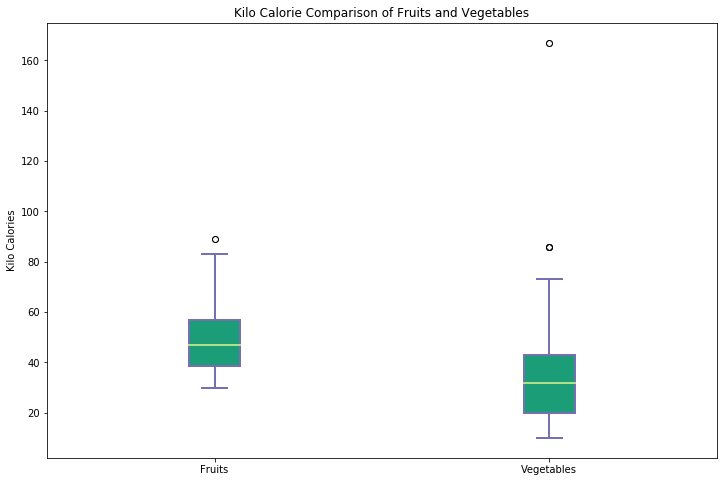

In [12]:
# Separate the Data into two
fruits = fresh[fresh["type"] == "fruit"]
vegetables = fresh[fresh["type"] == "vegetables"]

# Identify which data we want to plot
data_to_plot = [pd.to_numeric(fruits["kilo_calories"]),pd.to_numeric(vegetables["kilo_calories"])]

# Create a figure instance
fig = plt.figure(1, figsize=(12, 8))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

# Save the figure
fig.savefig('fig1.png', bbox_inches = 'tight')

bp = ax.boxplot(data_to_plot, patch_artist = True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    box.set( color = '#7570b3', linewidth = 2)
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color = '#7570b3', linewidth = 2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color = '#7570b3', linewidth = 2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color = '#b2df8a', linewidth = 2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker = 'o', color = '#e7298a', alpha = 0.5)
    
## Custom axis labels
ax.set_xticklabels(['Fruits', "Vegetables"])
ax.set_ylabel("Kilo Calories")
ax.set_title("Kilo Calorie Comparison of Fruits and Vegetables")

# Source : http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

There appears to be a few outliers, so we will take a deeper look at them.

In [13]:
# further explore outliers
fresh["kilo_calories"] = pd.to_numeric(fresh["kilo_calories"])
high_cal_food = fresh[fresh["kilo_calories"] > 80]
high_cal_food.sort_values(by = "kilo_calories", ascending = False)

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndb_num,kilo_calories
42,Fresh1,2.225544,0.740753,0.319670,0.960428,avocados,vegetables,09038,167
14,Fresh1,0.549417,0.640000,0.330693,0.283889,bananas,fruit,09040,89
38,Fresh1,1.054409,0.811301,0.440925,0.573049,sweet_potatoes,vegetables,11507,86
48,Fresh1,3.264928,0.540000,0.363763,2.199369,corn_sweet,vegetables,11900,86
7,Fresh1,2.078430,0.560000,0.341717,1.268275,pomegranate,fruit,09286,83


One can reasonably expect that fruit has a tendency to be more kilocalorie heavy compared to vegetables. So it is not too surprising that we see fruits tend to have more kilocalories compared to vegetables when looking at the visualization. We chose to illustrate the differences with box plots. Box plots provide us information about the minimumns, quartiles, median, max and outliers. Since we are interested in comparing the *tendency* of the kilocalorie values for fruits and vegetables, we will focus on observing the median values for the two groups. Therefore, we can confirm that on average (using median as a measure of center) have a greater kilocalorie value than vegetables. We make use of the median as a measure of center when comparing the two groups, because as it is clear in the plot, there are some outliers. Median values are *robust statistics* and are not influenced by extreme values or outliers, so we will be obtaining an accurate average.

Furthermore, it is apparent that there are some outliers for both food types, but there is one that is particularly intriguing. Upon further investigation we notice that the extreme point is actually a avocado. This is interesting to see, because the debate of whether avocados are fruits or vegetables is a popular topic of discussion that comes up. With that said, knowing that fruits tend to have a calorie value compared to vegetables, one can use this trend of differences between the fruits and vegetables' calorie value to support the claim that an avocado is actually a fruit, since fruits typically have higher kilocalories than vegetables.

We sourced our data via an API request from United States Department of Agriculture Agricultural Research Service, so we can also reasonably assume our data is reliable, and need not to be validated with another source.

# Which food provides the widest variety of nutrients?

First we will create a function `get_nutrients` in order to compute how many nutrients are in the basic report for a  given NDB number.

In [14]:
def get_nutrients(ndb_num):
    '''Takes an ndb_num and makes a request to obtain how many nutrients are in its basic report for the food the NDB
    number represents'''
    
    nutrients_count = 0
    report = ndb_report(ndb_num)
    for dictionary in report:
        if "nutrient_id" in dictionary.keys():
            nutrients_count += 1
                    
    return nutrients_count

Now that we have a function to compute the number of nutrients, we will apply this function to all NDB number we obtained for each food.

In [25]:
# append nutrient counts
nutrients_count = ndb_nums.apply(get_nutrients)
fresh["nutrient_count"] = nutrients_count

# Identify the max nutrient count
fresh["nutrient_count"] = pd.to_numeric(fresh["nutrient_count"])
fresh.sort_values(by = 'nutrient_count', ascending = False)
fresh.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndb_num,kilo_calories,nutrient_count
0,Fresh1,0.316639,0.52,0.330693,0.201366,watermelon,fruit,09326,30,33
1,Fresh1,0.520794,0.51,0.374786,0.382718,cantaloupe,fruit,09181,34,33
2,Fresh1,1.480396,0.74,0.407855,0.815929,tangerines,fruit,09221,43,33
3,Fresh1,2.508450,0.94,0.319670,0.853060,strawberries,fruit,09316,32,33
4,Fresh1,1.987999,0.94,0.363763,0.769319,plums,fruit,09279,46,33


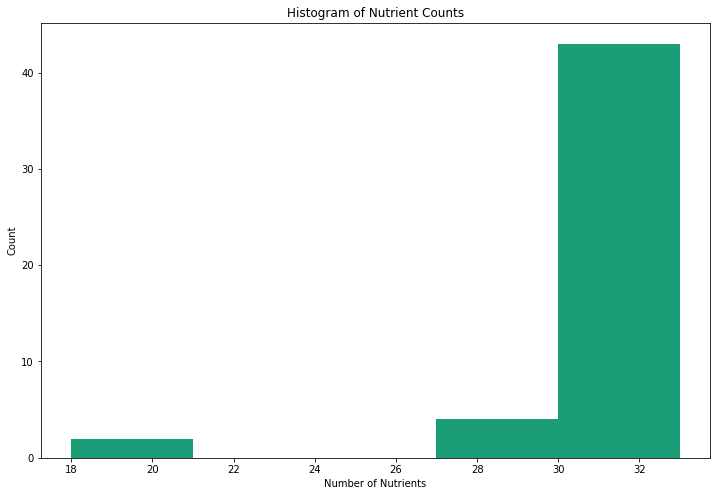

In [17]:
# distribution of nutrient counts
plt.figure(1, figsize = (12, 8))
plt.hist(pd.to_numeric(fresh["nutrient_count"]),color = '#1b9e77', bins = 5)
plt.ylabel('Count')
plt.xlabel('Number of Nutrients')
plt.title("Histogram of Nutrient Counts")
plt.show()

Now let's actually see what the name of those fruits actually are for both groups, the foods that offer the most nutrients vs. the foods that do not. The max value of nutrients in any given food is 33, so we will use that knowledge to see which foods are below or at that threshold.

#### Foods that do not offer a wide variety of nutrients

In [18]:
not_variety = fresh[fresh["nutrient_count"] < 33]
not_variety_l = not_variety["food"].str.lower()
df_nv = pd.DataFrame(not_variety_l).sort_values(by = "food").reset_index()
pd.DataFrame(df_nv.iloc[:,1])

,food
0,avocados
1,cherries
2,grapefruit
3,grapes
4,oranges
5,potatoes
6,"squash,winter,acorn"


#### Foods that offer a wide variety of nutrients

In [19]:
nutrient_variety = fresh[fresh["nutrient_count"] == 33]
nutrient_variety_l = nutrient_variety["food"].str.lower()
df_v = pd.DataFrame(nutrient_variety_l).sort_values(by = "food").reset_index()
pd.DataFrame(df_v.iloc[:,1])

,food
0,apples
1,apricots
2,artichoke
3,asparagus
4,bananas
5,"beans,snap,green"
6,blackberries
7,blueberries
8,brussels_sprouts
9,cabbage


It is first to be stated, we will be interpretating, "Which food has the *widest variety* of nutrients?" as "which foods have the most unique nutrients inside of them, independent of the actual, how low or high, value is for the respective nutrient.

From this we see that most of the foods provide a wide variety of nutrients at a max of 33 nutrients. It is quite surprising to see that actually most of the foods are found to be "wide in variety of nutrients." Since most of the foods appear to have a wide variety of nutrients, rather than list out all the foods that provide the widest variety of nutrients, we will also take note of the foods that do not offer the widest variety of nutrients (of 33 nutrients). <br>

The foods that are do not have a variety of nutrients are oranges, cherries, grapefruit, grapes, potatoes, winter squash and avacados. This is not to say they are not *healthy* as the other ones. We are merely comparing the number of nutrients the food contains, some foods with less nutrient counts may very well have a nutrient density that is greater than the foods classified to have more nutrient counts. Likewise, the foods we found to be widest in variety of nutrients are not necessarily more nutrient dense for the nutrients they do contain.

Ultimately, we know that fruits and vegetables are part of a healthy and balanced diet. Whether an indiivudal is to consume a fruit or vegetable, it s very likely that they will be consuming a food that contains many nutrients. But if they are seeking to consume a certain nutrient, it is not recommended to go simply off which food has the most nutrients, because what would need to be further explored is the actual values for each nutrient in the food.